In [1]:
from ipywidgets import interact
import numpy as np
import random

PRIZES = ['Car', 'Goat 1', 'Goat 2']

def monty_hall(example_num=0):
    '''
    Simulates one round of the Monty Hall Problem. Outputs a tuple of
    (result if stay, result if switch, result behind opened door) where
    each results is one of PRIZES.
    '''
    pick = random.choice(PRIZES)
    opened = random.choice(
        [p for p in PRIZES if p != pick and p != 'Car']
    )
    remainder = next(p for p in PRIZES if p != pick and p != opened)
    return (pick, remainder, opened)

interact(monty_hall, example_num=(0, 100));

interactive(children=(IntSlider(value=0, description='example_num'), Output()), _dom_classes=('widget-interact…

Row
    [0] Column
        [0] FloatInput(end=20, name='n', start=1, step=1, value=10, width=100)
    [1] Matplotlib(Figure)
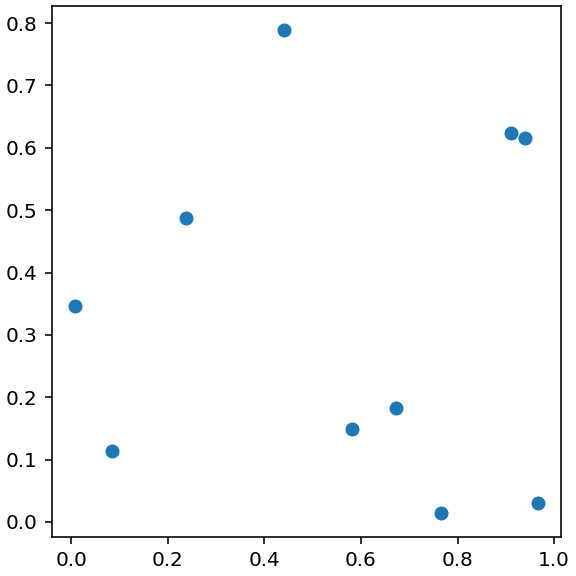

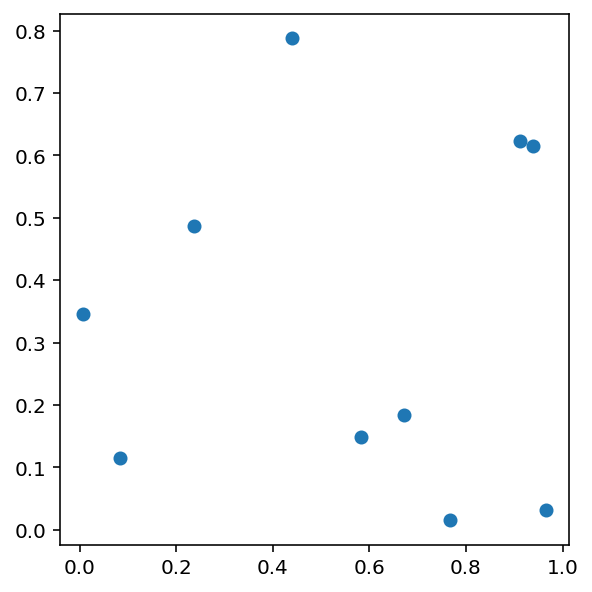

In [41]:
import matplotlib.pyplot as plt
import panel as pn
import panel.widgets as pnw

pn.extension()

def gen_plot_xy():
    random.seed(1234)
    x = [random.random() for _ in range(n[0].value)]
    y = [random.random() for _ in range(n[0].value)]
    fig = plt.figure(constrained_layout=True, figsize=(4, 4))
    plt.scatter(x, y)
    plt.close(fig)
    return fig

def plot_xy_update(event):
    dash[1] = gen_plot_xy()

n = pn.Column(pnw.FloatInput(name="n", value=10, step=1, start=1, end=20, width=100))
plot = gen_plot_xy()

watch_vars = n[0].param.watch(plot_xy_update, ["value"], onlychanged=True)

dash = pn.Row(n, plot)
display(dash)